In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


In [26]:
data = pd.read_json('data/miljodata.json')

In [27]:
# Trekker ut timeseriedata
timeseries = data.loc['timeseries', 'properties']
timeseries_df = pd.DataFrame(timeseries)

# Pakker ut måleverdier
data_values = pd.json_normalize(timeseries_df['data'])

# Kombiner tidspunkter og måledata
full_data = pd.concat([timeseries_df['time'], data_values], axis=1)


In [28]:
# Gir kolonnene enkle navn
full_data.rename(columns={
    'instant.details.air_temperature': 'temperatur',
    'instant.details.relative_humidity': 'luftfuktighet'
}, inplace=True)


In [29]:
# Sjekker datasettet
print(full_data.head())


                   time  instant.details.air_pressure_at_sea_level  \
0  2025-05-19T11:00:00Z                                     1022.6   
1  2025-05-19T12:00:00Z                                     1022.4   
2  2025-05-19T13:00:00Z                                     1022.4   
3  2025-05-19T14:00:00Z                                     1022.0   
4  2025-05-19T15:00:00Z                                     1022.0   

   temperatur  instant.details.cloud_area_fraction  luftfuktighet  \
0        14.5                                 12.9           71.7   
1        13.6                                 47.3           73.4   
2        12.6                                 89.3           78.5   
3        12.5                                 91.3           79.3   
4        12.0                                 93.5           82.5   

   instant.details.wind_from_direction  instant.details.wind_speed  \
0                                326.3                         3.5   
1                       

In [30]:
# Håndter manglende verdier
full_data.dropna(subset=['temperatur', 'luftfuktighet'], inplace=True)


In [31]:
# Velg input og output for regresjon
X = full_data[['temperatur']]  # uavhengig variabel
y = full_data['luftfuktighet']  # avhengig variabel

# Del opp i trenings- og testsett
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [32]:
model = LinearRegression()
model.fit(X_train, y_train)

# Lag prediksjoner
y_pred = model.predict(X_test)

# Evaluer modellen
print(f"Mean Squared Error (MSE): {mean_squared_error(y_test, y_pred):.2f}")
print(f"R-squared (R2 score): {r2_score(y_test, y_pred):.2f}")


Mean Squared Error (MSE): 105.02
R-squared (R2 score): 0.07


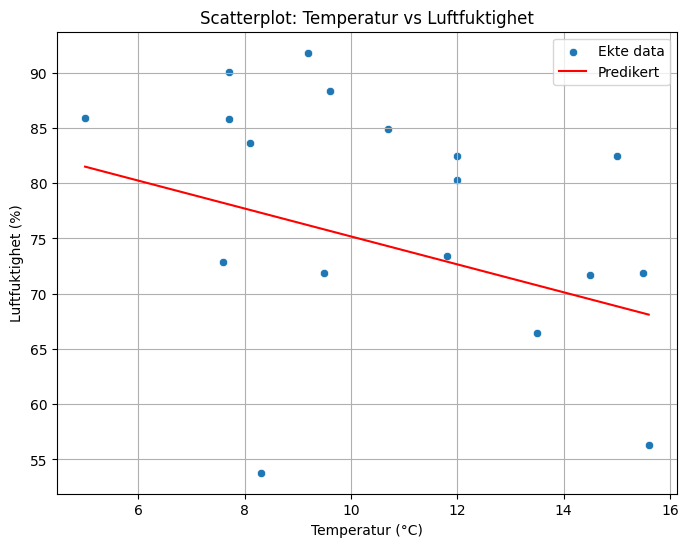

In [33]:
# Scatterplot med regresjonslinje
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_test['temperatur'], y=y_test, label='Ekte data')
sns.lineplot(x=X_test['temperatur'], y=y_pred, color='red', label='Predikert')
plt.title('Scatterplot: Temperatur vs Luftfuktighet')
plt.xlabel('Temperatur (°C)')
plt.ylabel('Luftfuktighet (%)')
plt.legend()
plt.grid(True)
plt.show()


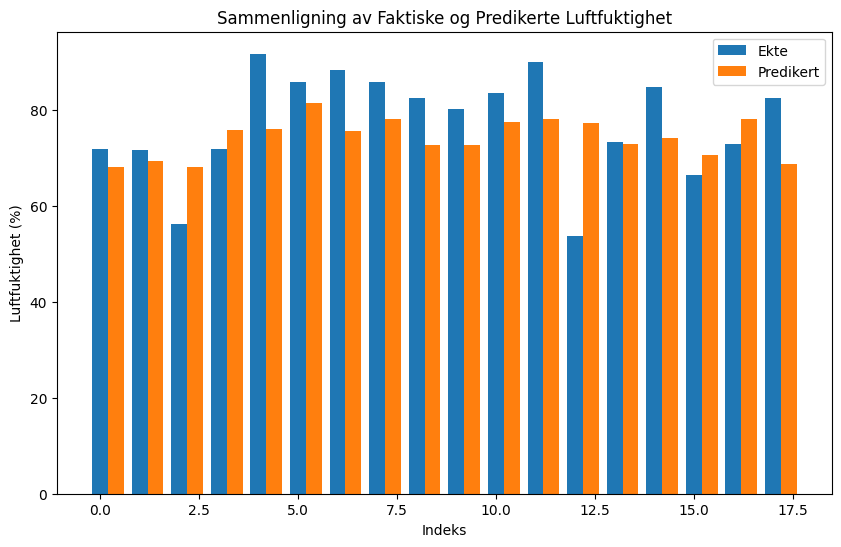

In [34]:
# Søylediagram Faktiske vs Predikerte verdier
plt.figure(figsize=(10, 6))
width = 0.4
indices = np.arange(len(y_test))
plt.bar(indices, y_test, width=width, label='Ekte')
plt.bar(indices + width, y_pred, width=width, label='Predikert')
plt.title('Sammenligning av Faktiske og Predikerte Luftfuktighet')
plt.xlabel('Indeks')
plt.ylabel('Luftfuktighet (%)')
plt.legend()
plt.show()


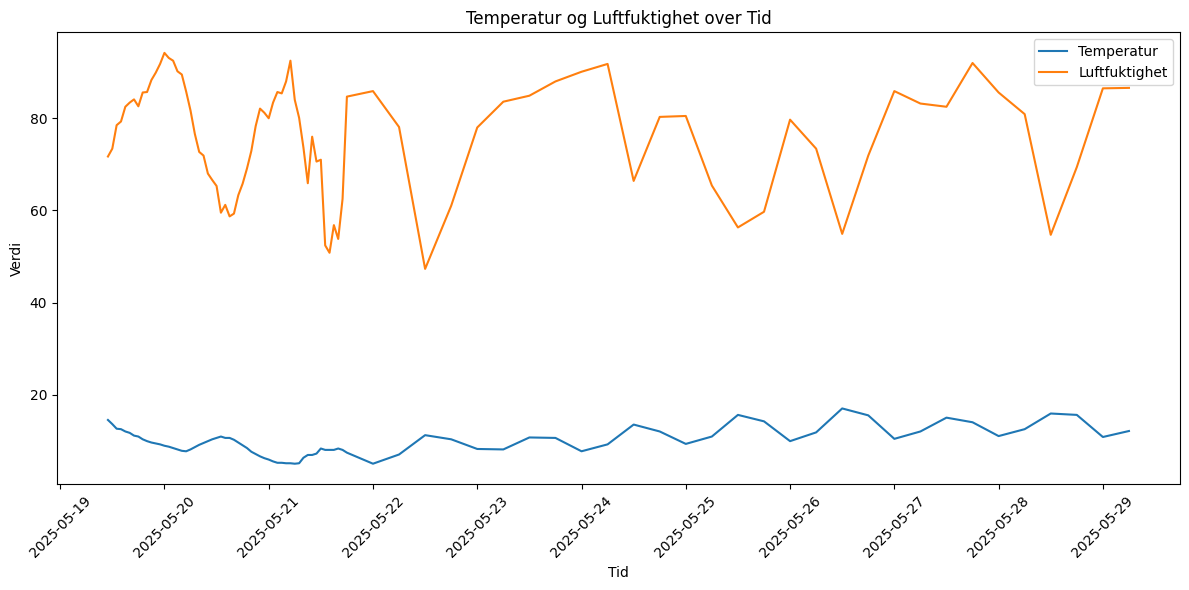

In [35]:
# Konverter og sorter etter tid
full_data['time'] = pd.to_datetime(full_data['time'])
full_data.sort_values('time', inplace=True)

# Linjediagram over Tid
plt.figure(figsize=(12, 6))
plt.plot(full_data['time'], full_data['temperatur'], label='Temperatur')
plt.plot(full_data['time'], full_data['luftfuktighet'], label='Luftfuktighet')
plt.title('Temperatur og Luftfuktighet over Tid')
plt.xlabel('Tid')
plt.ylabel('Verdi')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


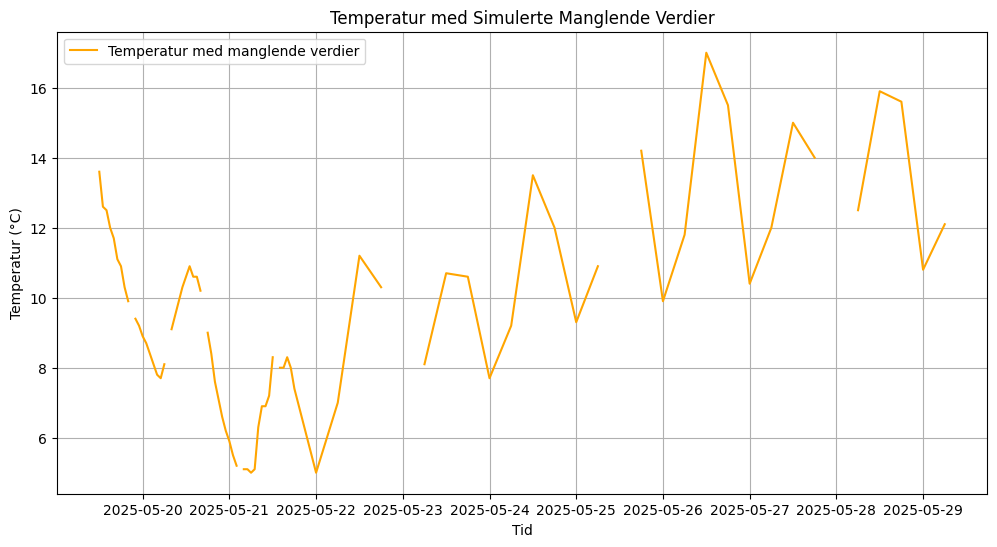

In [36]:
# Demonstrasjon: Manglende verdier-effekt
full_data_missing = full_data.copy()
full_data_missing.loc[::10, 'temperatur'] = np.nan

plt.figure(figsize=(12, 6))
plt.plot(full_data_missing['time'], full_data_missing['temperatur'], label='Temperatur med manglende verdier', color='orange')
plt.title('Temperatur med Simulerte Manglende Verdier')
plt.xlabel('Tid')
plt.ylabel('Temperatur (°C)')
plt.legend()
plt.grid(True)
plt.show()


In [37]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Uavhengig og avhengig variabel
X = full_data[['temperatur']]
y = full_data['luftfuktighet']

# Splitt i trenings- og testsett
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Tren lineær regresjonsmodell
model = LinearRegression()
model.fit(X_train, y_train)

# Lag prediksjoner
y_pred = model.predict(X_test)

# Evaluer modellen
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("📊 Modellresultater")
print(f" - Mean Squared Error (MSE): {mse:.2f}")
print(f" - R-squared (R²): {r2:.2f}")

# Eksempel: Vis noen prediksjoner
results_df = X_test.copy()
results_df['Faktisk luftfuktighet'] = y_test.values
results_df['Predikert luftfuktighet'] = y_pred
print(results_df.head())


📊 Modellresultater
 - Mean Squared Error (MSE): 105.02
 - R-squared (R²): 0.07
    temperatur  Faktisk luftfuktighet  Predikert luftfuktighet
75        15.5                   71.9                68.231693
0         14.5                   71.7                69.494629
70        15.6                   56.3                68.105399
22         9.5                   71.9                75.809311
12         9.2                   91.8                76.188192


## 📈 Modellering og Evaluering

Vi bruker en enkel lineær regresjonsmodell for å predikere luftfuktighet basert på temperatur.

Modellen trenes på 80 % av dataene, og testes på de resterende 20 %.

Vi evaluerer modellen med:
- **MSE (Mean Squared Error):** Gjennomsnittlig kvadratisk avvik mellom faktisk og predikert verdi.
- **R² (R-squared):** Andel av variasjon i dataene som modellen forklarer.

Nedenfor vises både ytelsen og et lite utvalg av prediksjonene.
